In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import scipy.stats as stat
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

### **Problem Statement - Consider only the below columns and prepare a prediction model for predicting Price.**

**Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]**


Model -- model of the car

Price -- Offer Price in EUROs

Age_08_04 -- Age in months as in August 2004

KM -- Accumulated Kilometers on odometer

HP -- Horse Power

cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms

### **Importing Dataset**

In [4]:
raw_data=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
raw_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
print('Number of Rows{}Columns'.format(raw_data.shape))

Number of Rows(1436, 38)Columns


In [6]:
raw_data=raw_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
raw_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
raw_data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


Observation: There are some missing values in the Data set by reading Counts from Above


**Checking for Data types**

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


Observation: all the data types are correct .


**Checking for missing values**

In [9]:
raw_data[raw_data.values==0.0]


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight


In [10]:
raw_data.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

**Visualizing Missing Values**

<Axes: >

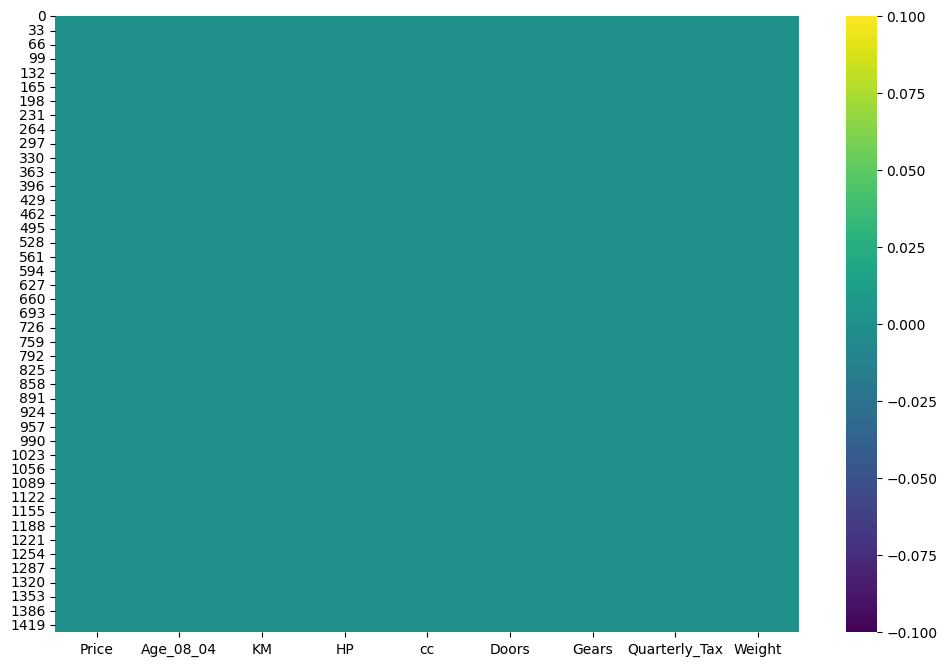

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(raw_data.isnull(),cmap='viridis')

Observation: Feature 'HP' has missing Values in the data set.

We will have to handle the missing values by observing the distribution and making the optimal choice

In [12]:
raw_data.HP.unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73])

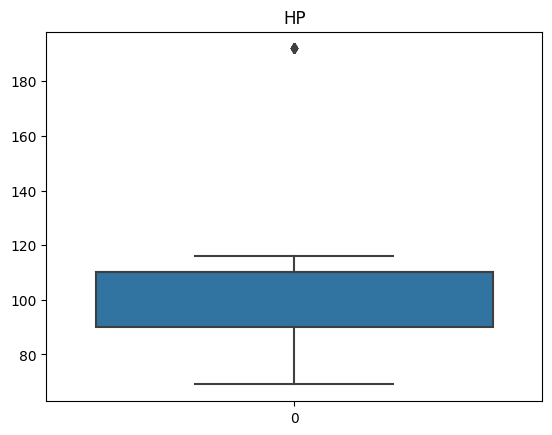

In [13]:
sns.boxplot(raw_data['HP'])
plt.title('HP')
plt.show()

<Axes: >

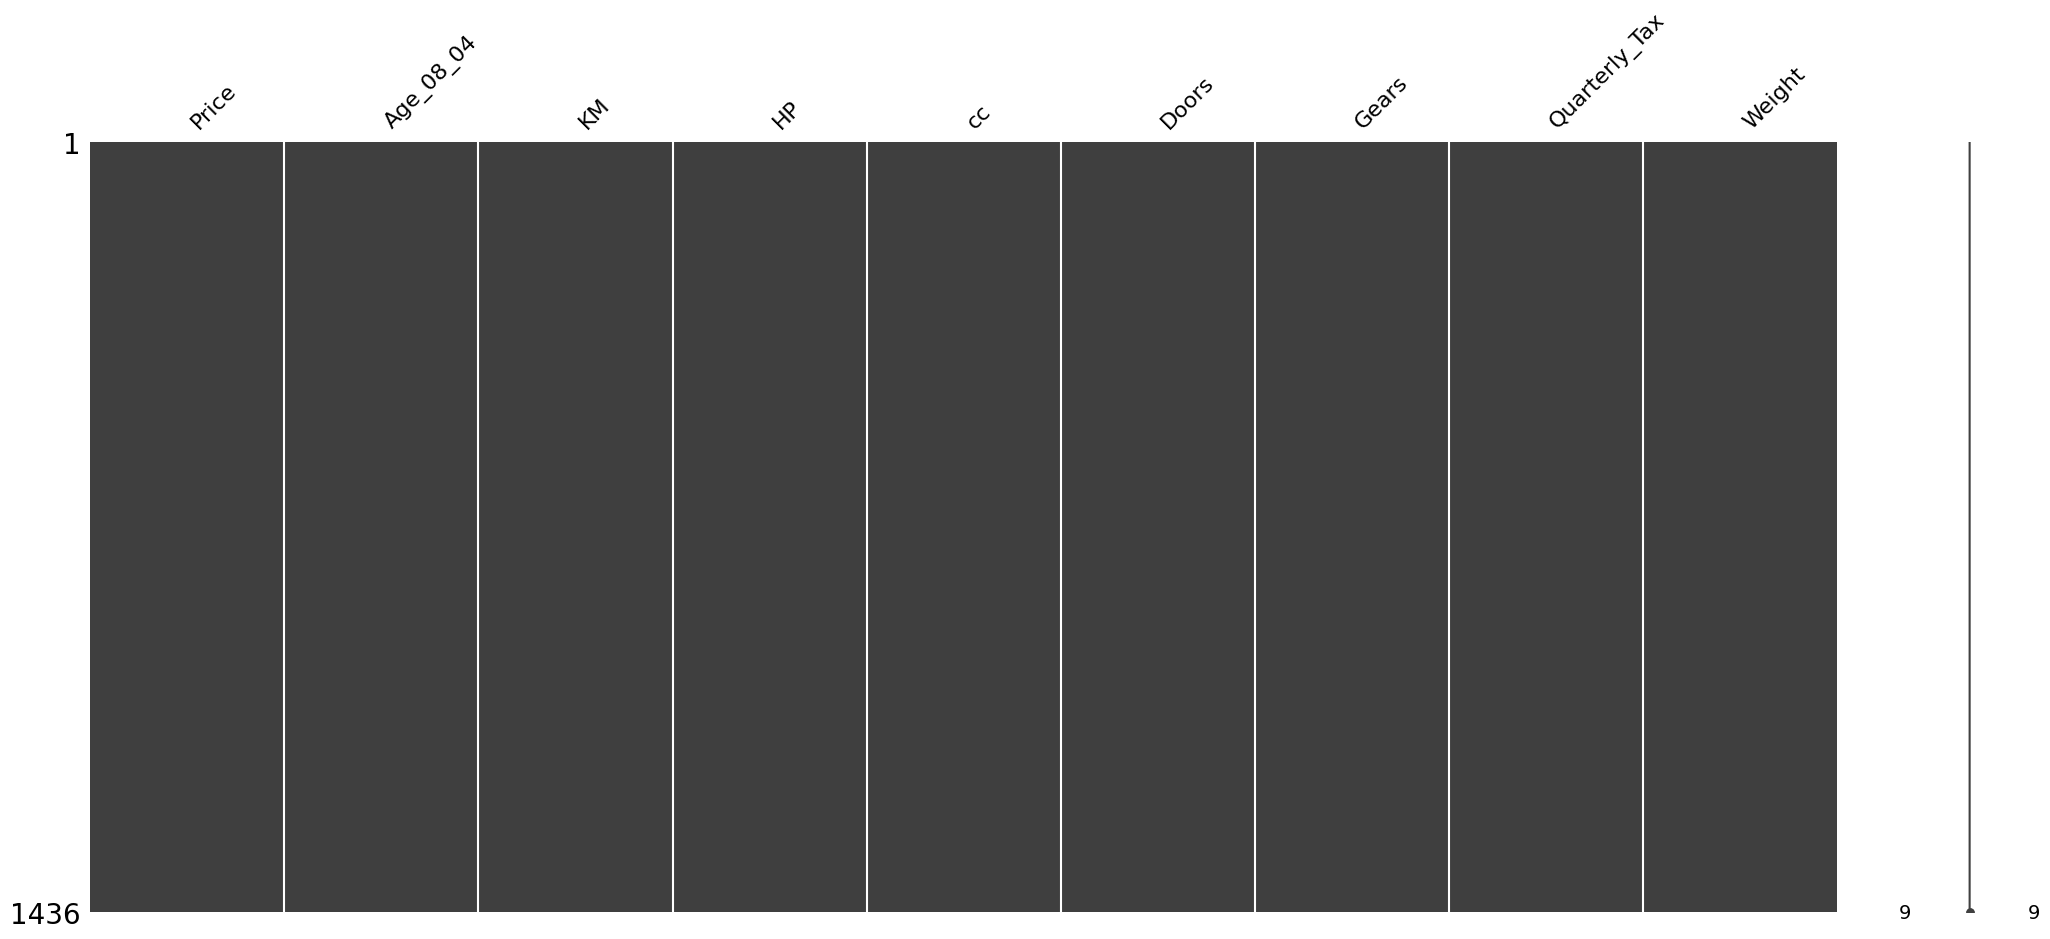

In [14]:
mn.matrix(raw_data)

Observation: After checking above there is no null value present in the dataset

**Checking for Duplicated Values**

In [15]:
raw_data[raw_data.duplicated()].shape

(1, 9)

In [16]:
raw_data[raw_data.duplicated()]


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [17]:
raw_data=raw_data.drop_duplicates().reset_index(drop=True)
raw_data[raw_data.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight


Observation: There are duplicated values in the dataset.

Hence, we dropped those values.

**Let's find how many discrete and continuous feature are their in our dataset by seperating them in variables.**

In [18]:
discrete_feature=[feature for feature in raw_data.columns if len (raw_data[feature].unique()) <20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 5


In [19]:
continuous_feature=[feature for feature in raw_data.columns if raw_data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


In [20]:
continuous_feature

['Price', 'Age_08_04', 'KM', 'Weight']

In [21]:
discrete_feature

['HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax']

**Exploratory Data Anlaysis**

**Visualizing the Distribution of Continuous Features with the help of Histograms and Probability Plot**

In [22]:
import pylab
def plot_data(raw_data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    raw_data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(raw_data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Weight')

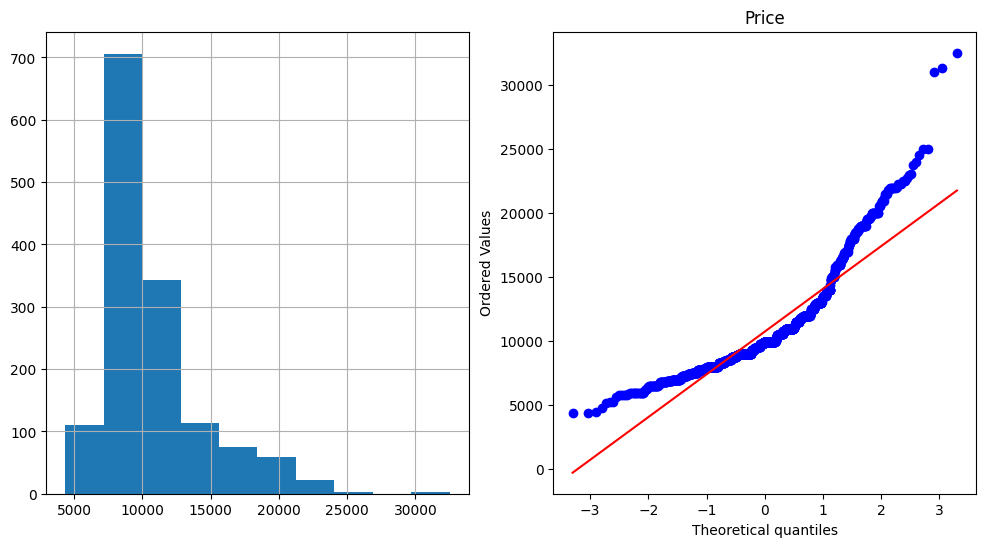

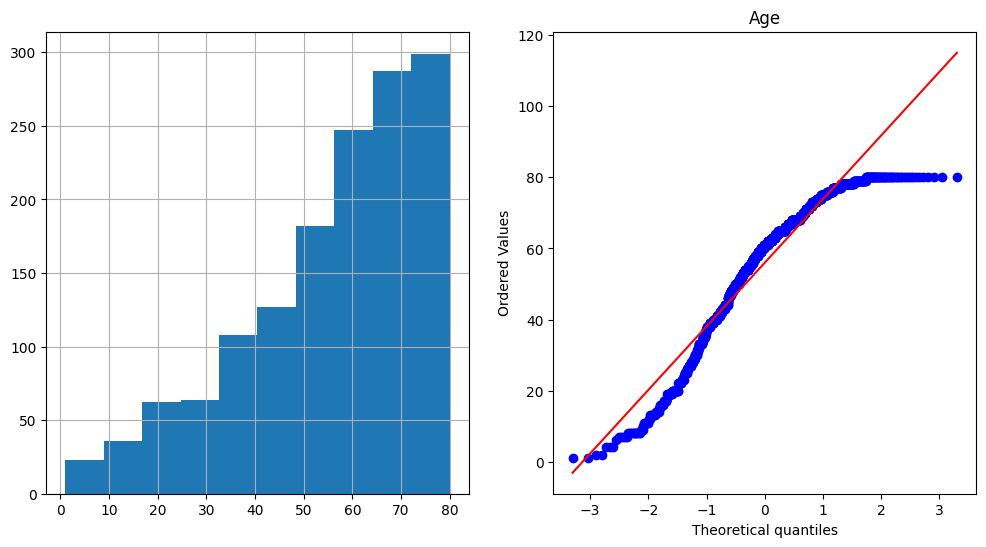

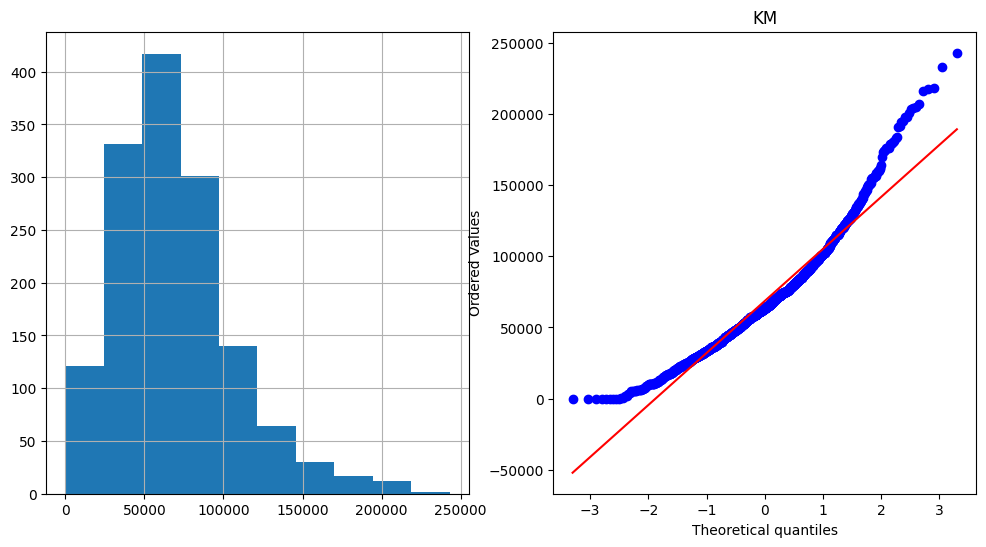

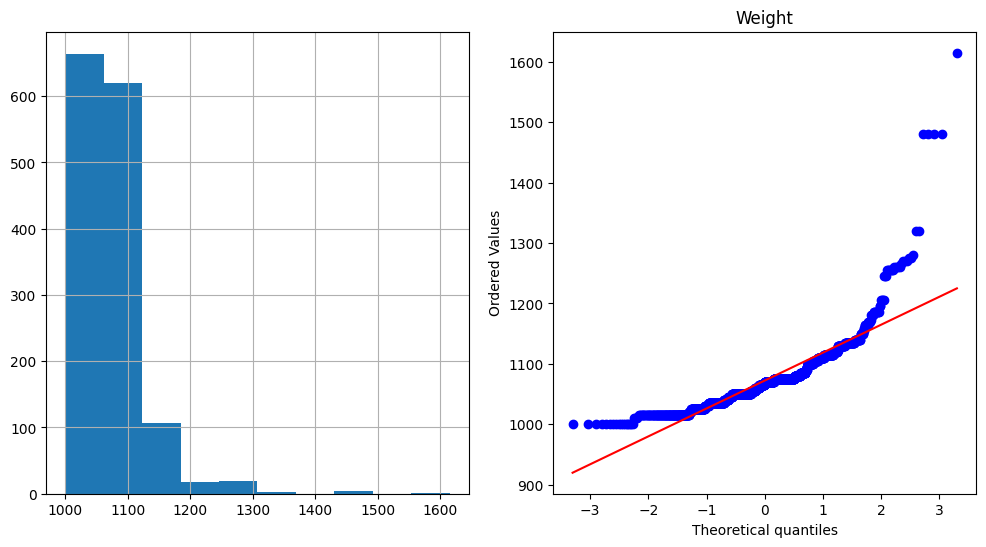

In [23]:
plot_data(raw_data,'Price')
plt.title('Price')
plot_data(raw_data,'Age_08_04')
plt.title('Age')
plot_data(raw_data,'KM')
plt.title('KM')
plot_data(raw_data,'Weight')
plt.title('Weight')

**Log transformation and visualizing the Histogram to determine any possible changes in distribution**

Text(0.5, 1.0, 'Weight')

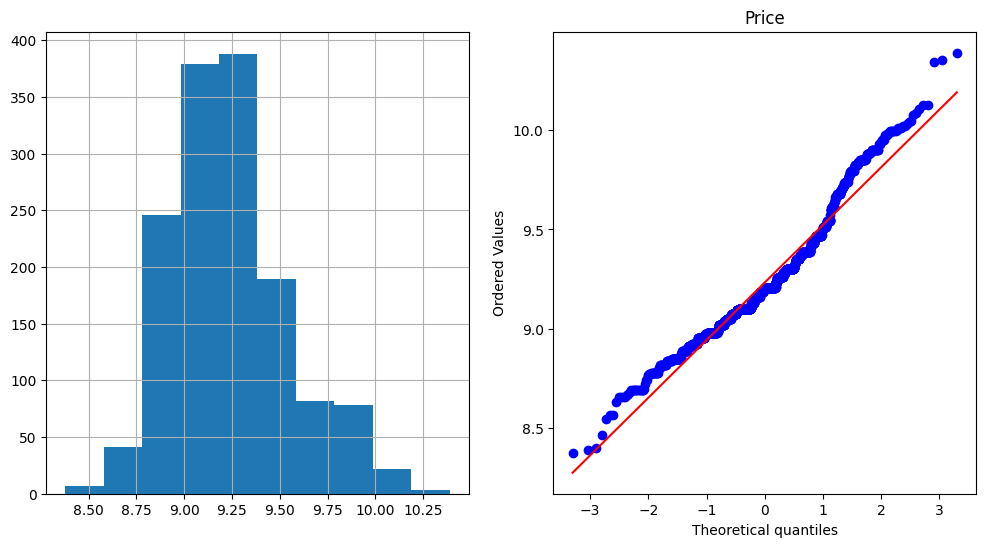

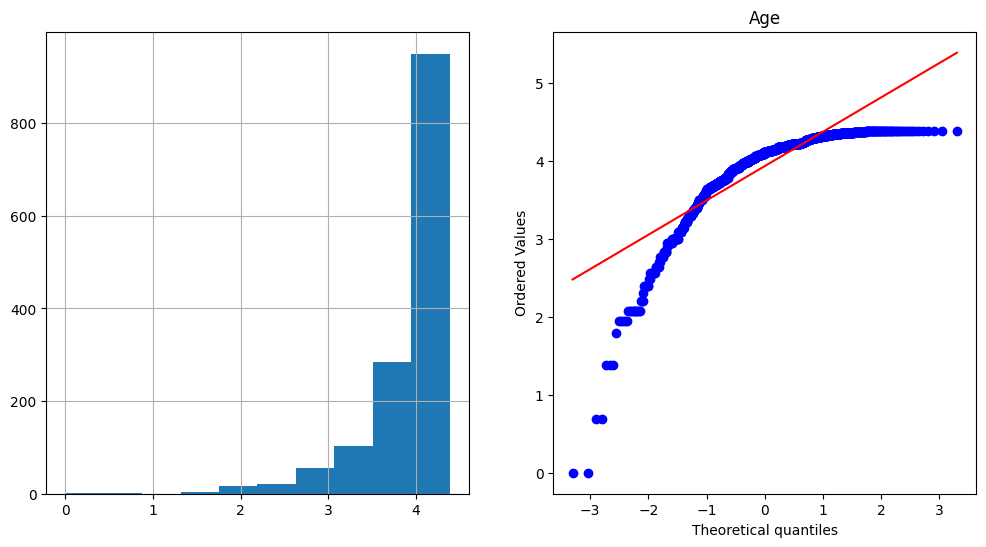

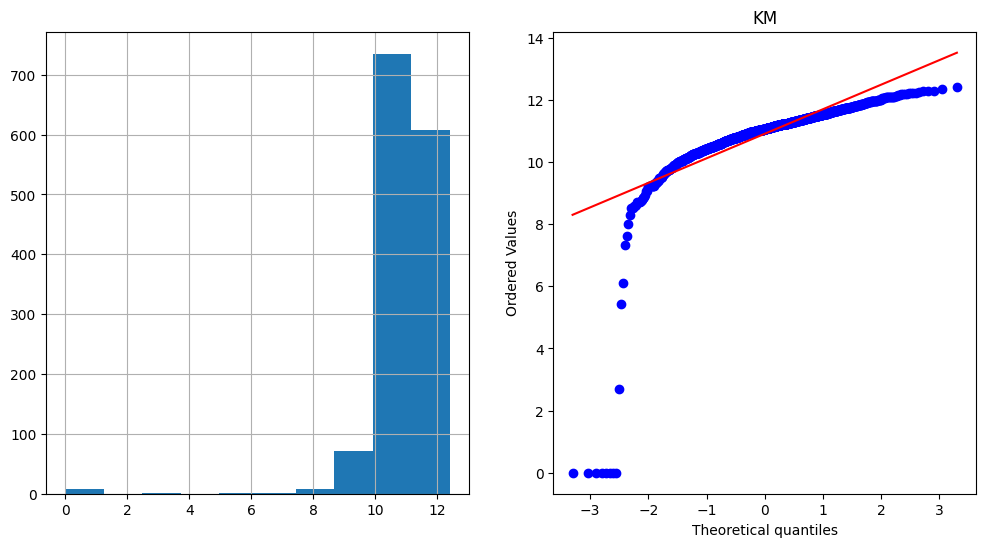

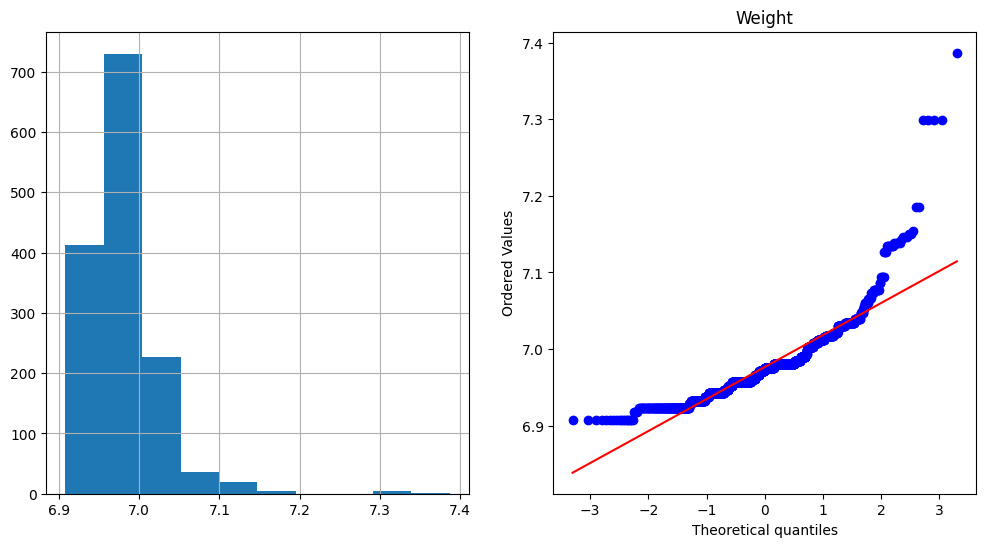

In [24]:
df=raw_data.copy()
df[continuous_feature]=np.log(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age_08_04')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

**Square root transformation and visualizing the Histogram to determine any possible changes in distribution**

Text(0.5, 1.0, 'Weight')

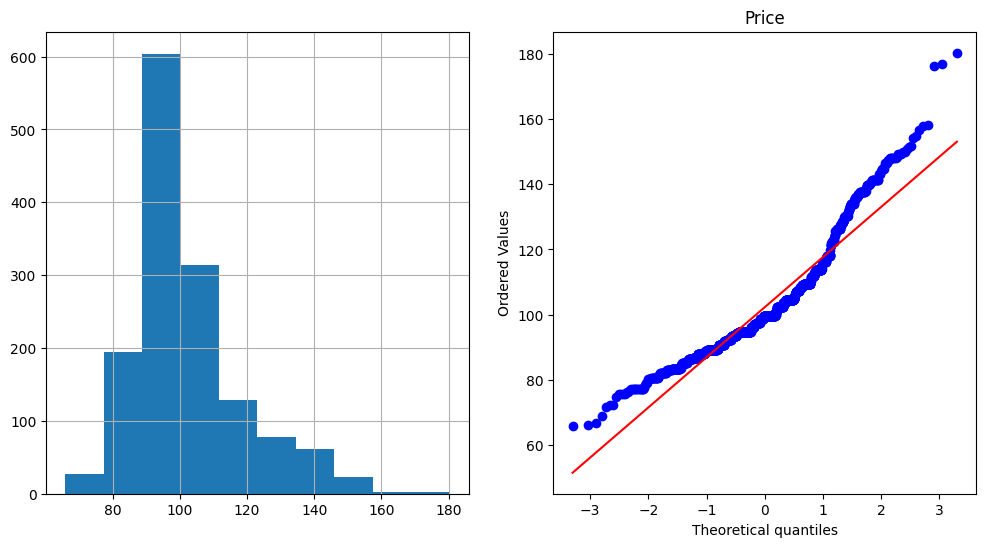

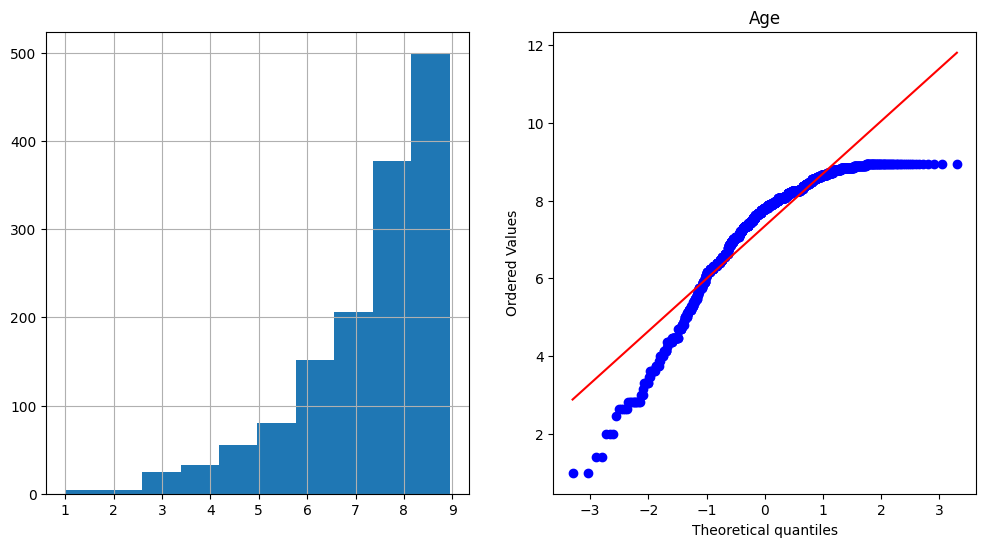

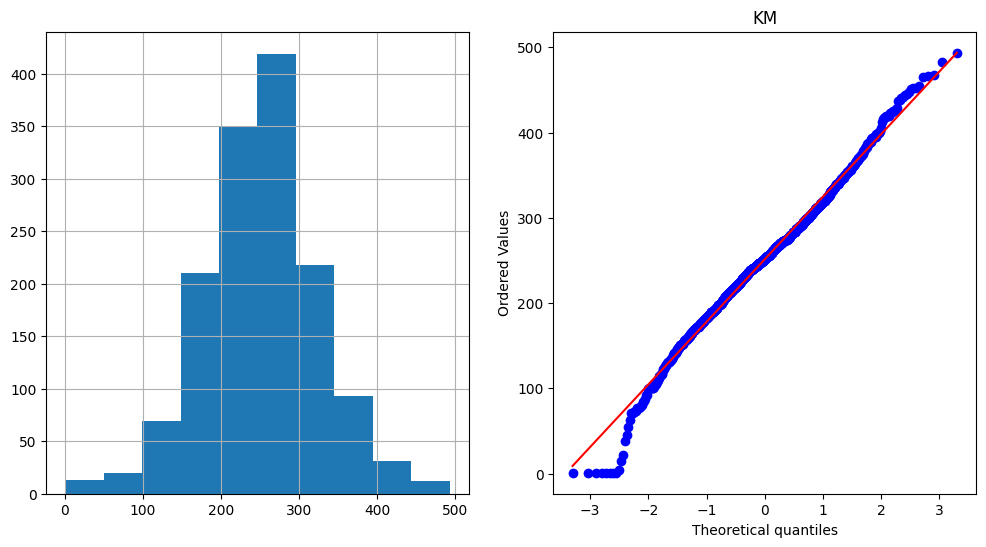

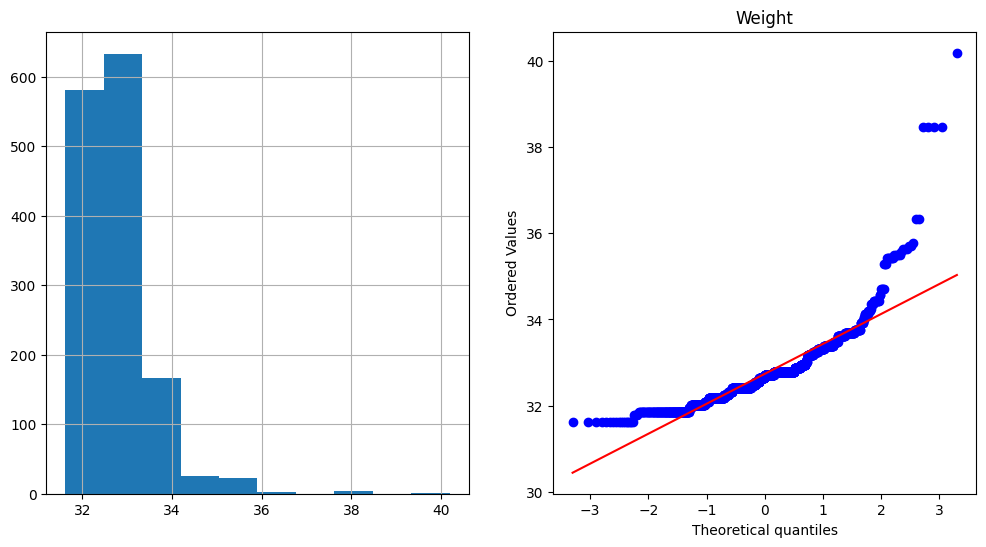

In [25]:
df=raw_data.copy()
df[continuous_feature]=np.sqrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age_08_04')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')


**Cuberoot transformation and visualizing the Histogram to determine any possible changes in distribution**

Text(0.5, 1.0, 'Weight')

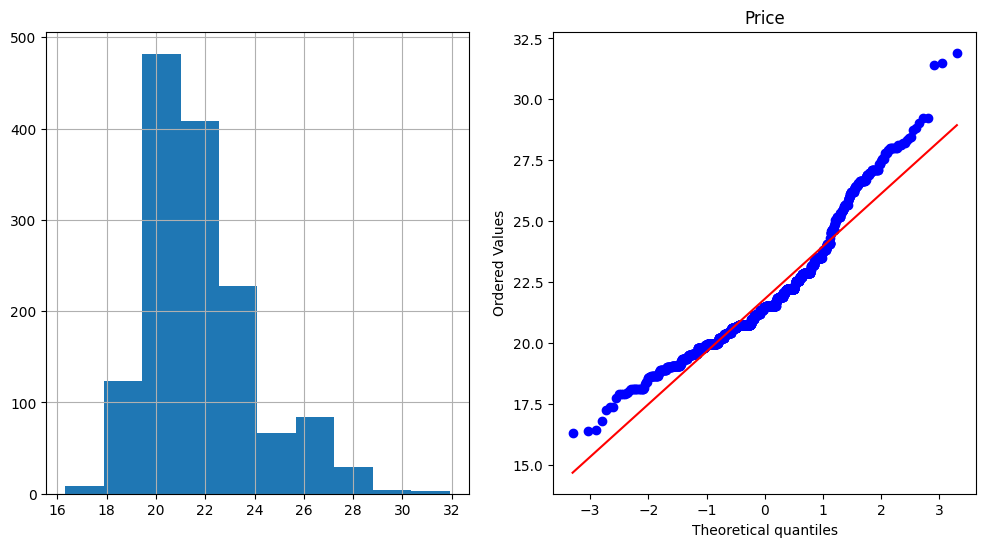

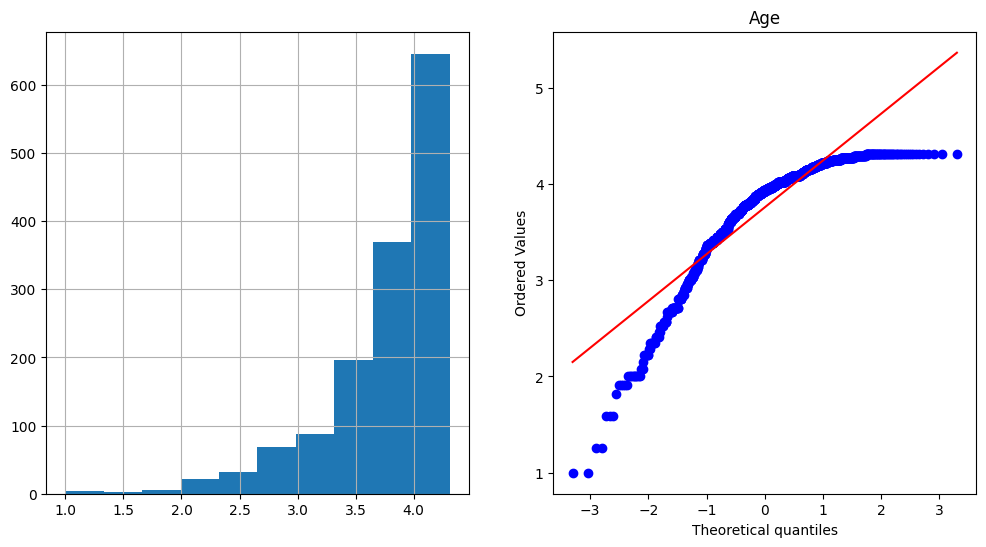

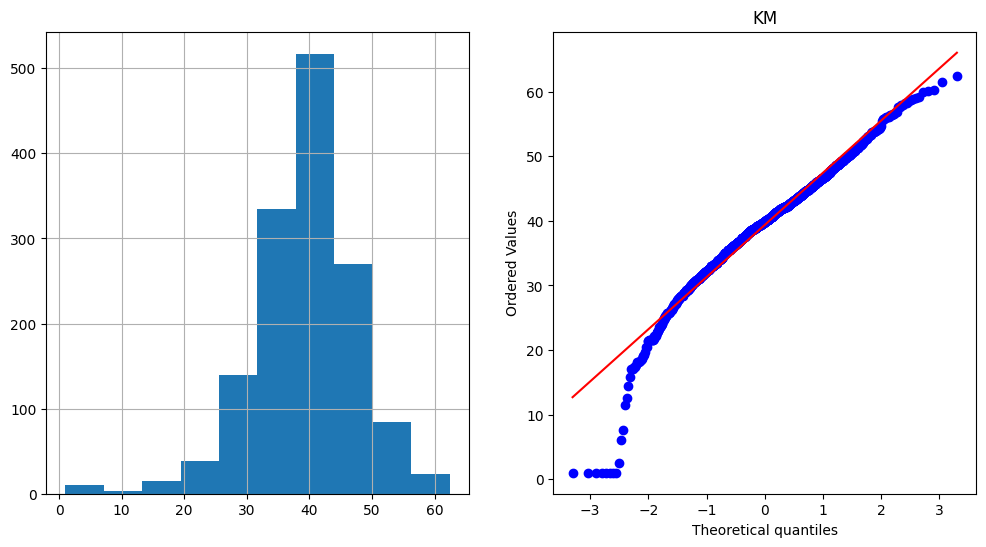

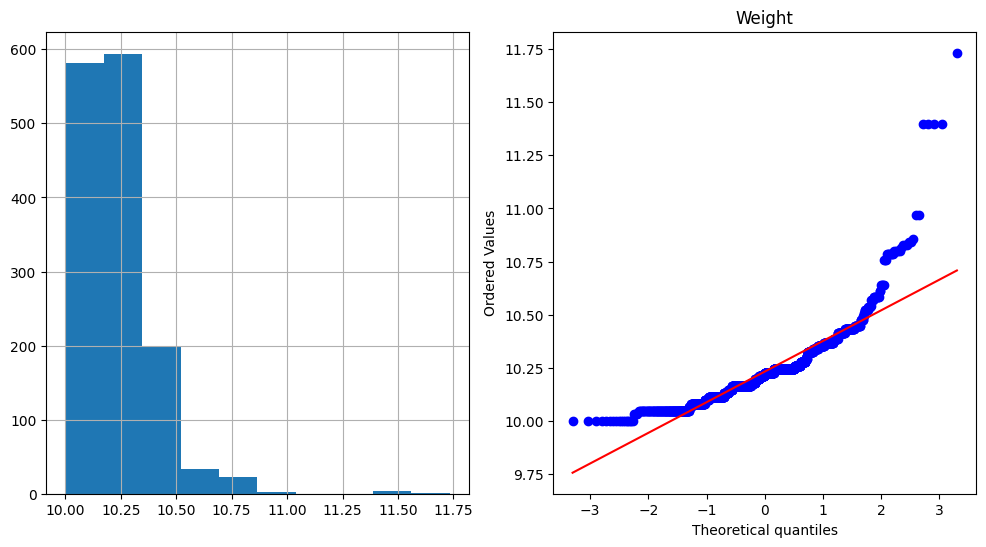

In [26]:
df=raw_data.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age_08_04')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

**Note: Most of the Continuous Features visually do not look normally distributed lets have some Hypothetical test to check the normailty.**

**The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution.**

**To perform a Shapiro-Wilk test in Python we can use the scipy.stats.shapiro() function, which takes on the following syntax:**

In [27]:
raw_data.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [28]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('Price feature -',shapiro(raw_data.Price),'\n'
     'Age feature -',shapiro(raw_data.Age_08_04),'\n'
     'Weight feature -',shapiro(raw_data.Weight),'\n'
     'KM feature -',shapiro(raw_data.KM))

Price feature - ShapiroResult(statistic=0.8534729480743408, pvalue=1.5960294063332542e-34) 
Age feature - ShapiroResult(statistic=0.926694929599762, pvalue=6.738004885543532e-26) 
Weight feature - ShapiroResult(statistic=0.7825542688369751, pvalue=5.042796731627146e-40) 
KM feature - ShapiroResult(statistic=0.9475831389427185, pvalue=3.444094263209402e-22)


Observation: Since the p-values are less than .05, we reject the null hypothesis.

We have sufficient evidence to say that the sample data does not come from a normal distribution.

**Visualizing the Relation between each independent Feature with respect to the Dependent Feature**

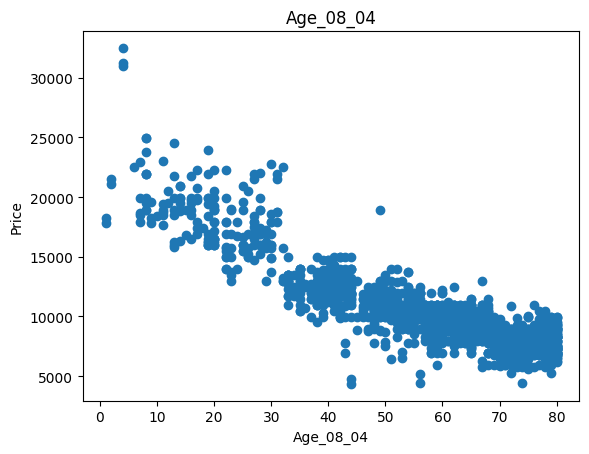

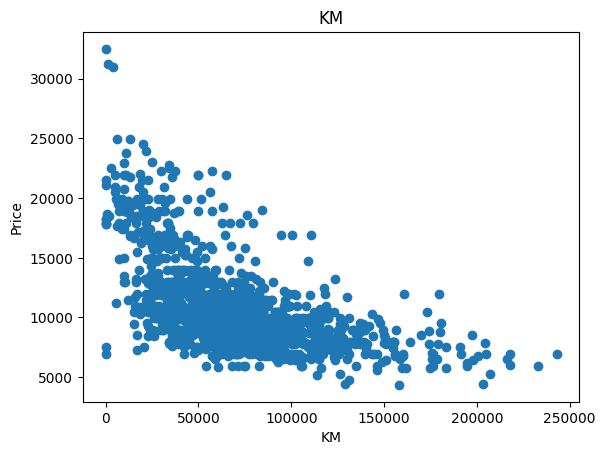

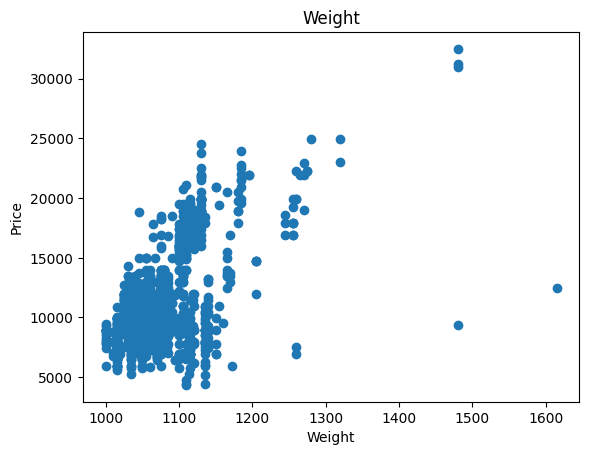

In [29]:
for feature in continuous_feature:
    if feature!="Price":
        df=raw_data.copy()
        plt.scatter(df[feature],df['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

Observation: Age feature has a good linear relation with Price a Negative Correlation as compare to other features.

**Now analyze the relationship between the discrete variables and Price**

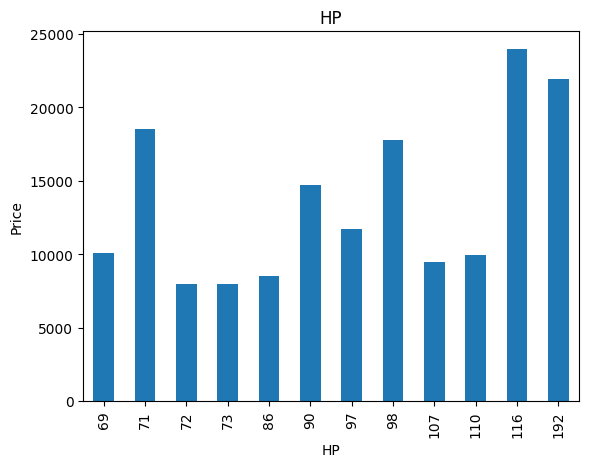

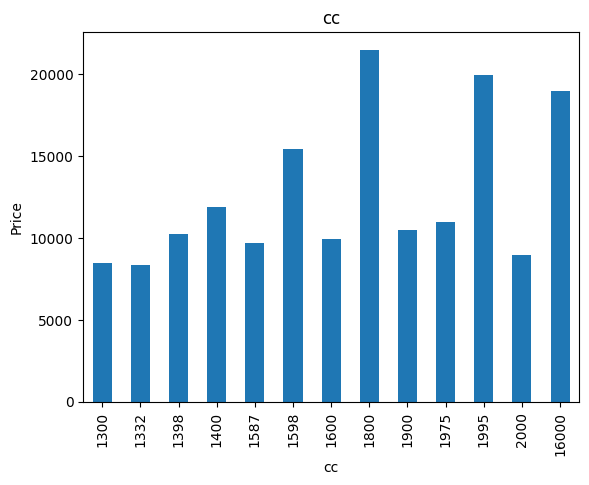

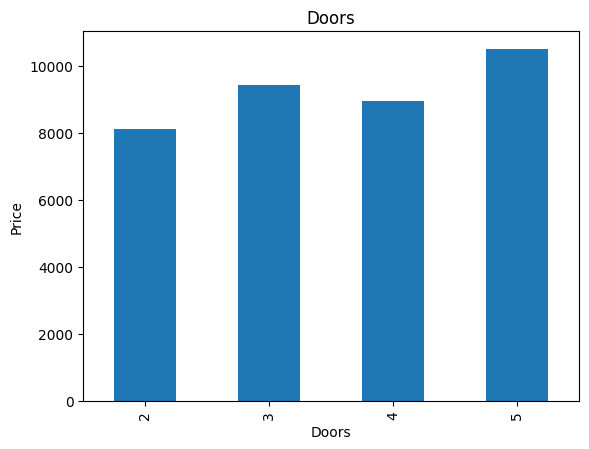

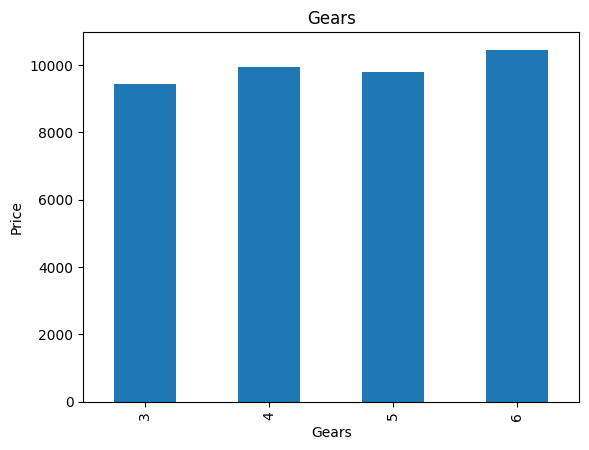

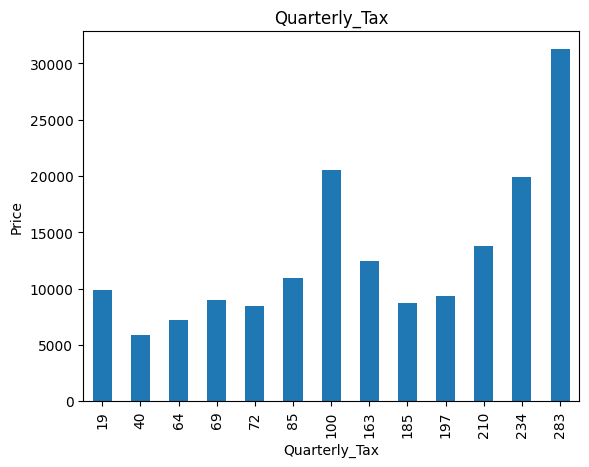

In [30]:
for feature in discrete_feature:
    df=raw_data.copy()
    df.groupby(feature)["Price"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(feature)
    plt.show()

Observation:There is'nt much of difference between how much Gears and Doors each Car has to have a significant amount of changes in Prices from each other and there is'nt any direct relation.

**Visualizing Continuous Datatype for Outlier Detection**

ValueError: ignored

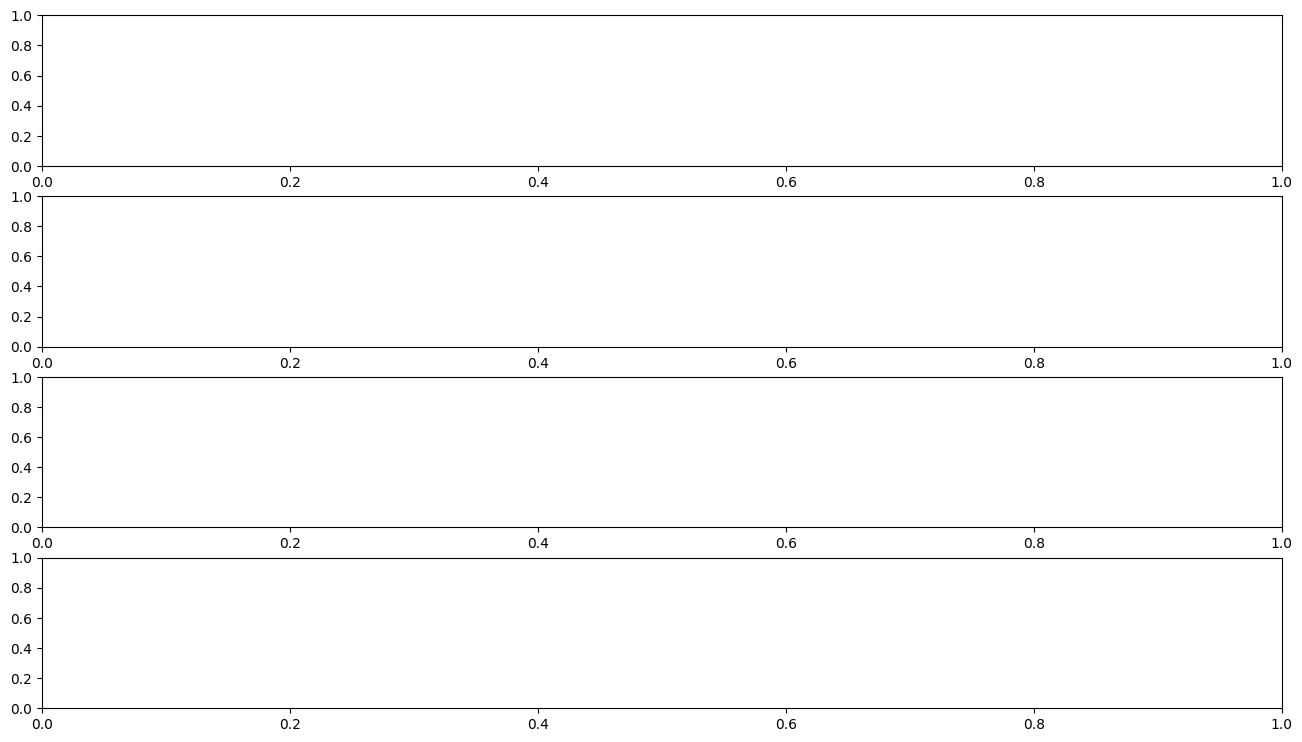

In [38]:
df=raw_data.copy()
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Prices',raw_data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age_08_04',raw_data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',raw_data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',raw_data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

**Before handling Outliers lets build a model and compare its R-squared value with other techniques to see which technique suits best for out case**

**Let's try Median Imputation to handle Outlier in Profit**

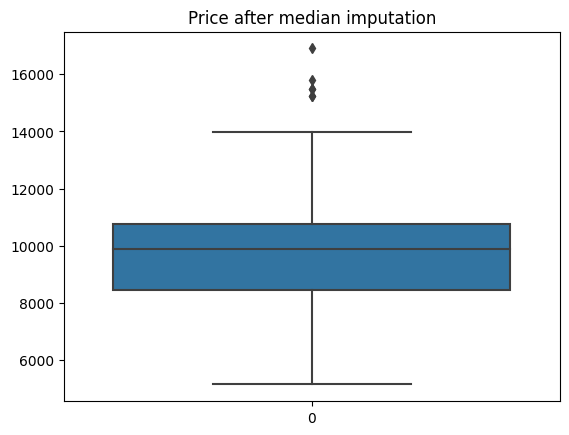

In [39]:
df1=raw_data.copy()
for i in raw_data['Price']:
    q1 = np.quantile(df1.Price,0.25)
    q3 = np.quantile(df1.Price,0.75)
    med = np.median(df1.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Price'] = df1['Price'].replace(i, np.median(df1['Price']))
sns.boxplot(df1['Price'])
plt.title('Price after median imputation')
plt.show()

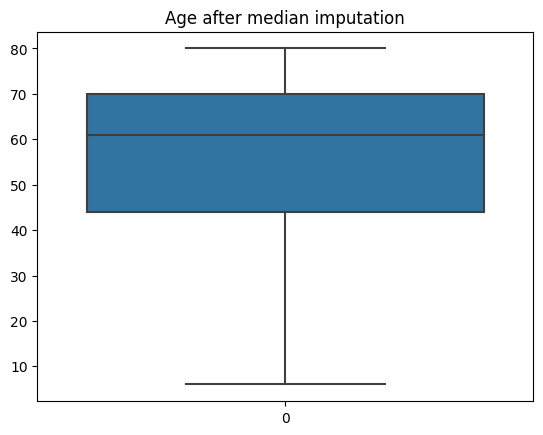

In [45]:
for i in raw_data['Age_08_04']:
    q1 = np.quantile(df1.Age_08_04,0.25)
    q3 = np.quantile(df1.Age_08_04,0.75)
    med = np.median(df1.Age_08_04)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Age_08_04'] = df1['Age_08_04'].replace(i, np.median(df1['Age_08_04']))
sns.boxplot(df1['Age_08_04'])
plt.title('Age after median imputation')
plt.show()

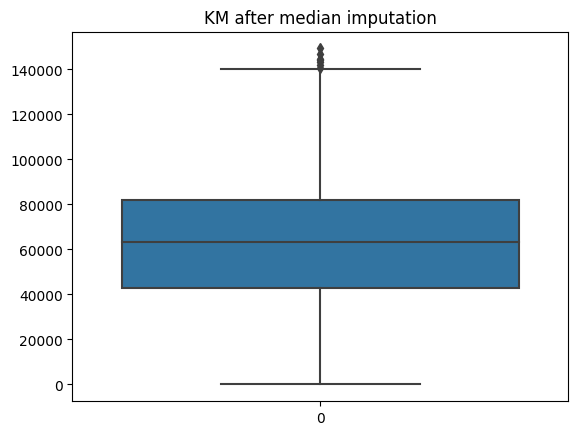

In [47]:
for i in raw_data['KM']:
    q1 = np.quantile(df1.KM,0.25)
    q3 = np.quantile(df1.KM,0.75)
    med = np.median(df1.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['KM'] = df1['KM'].replace(i, np.median(df1['KM']))
sns.boxplot(df1['KM'])
plt.title('KM after median imputation')
plt.show()

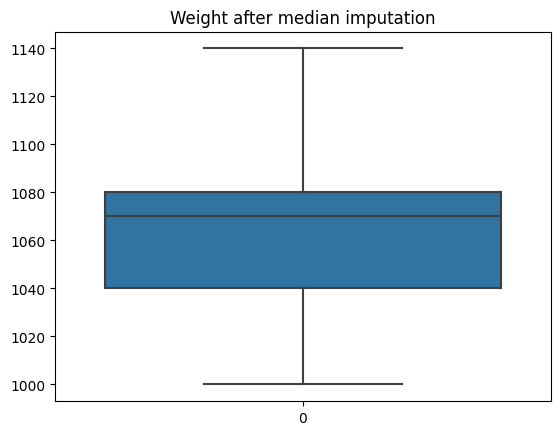

In [48]:
for i in raw_data['Weight']:
    q1 = np.quantile(df1.Weight,0.25)
    q3 = np.quantile(df1.Weight,0.75)
    med = np.median(df1.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Weight'] = df1['Weight'].replace(i, np.median(df1['Weight']))
sns.boxplot(df1['Weight'])
plt.title('Weight after median imputation')
plt.show()

### **Now test our data in model and find the R-squared with median imputation data model**

In [51]:
after_median_imputation_model = smf.ols("Price~Age_08_04+KM+Weight", data = df1).fit()
# Finding rsquared values
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj

(0.34204996085646155, 0.3406706106695778)

**Now try Mean Imputation to handle Outlier in Profit**

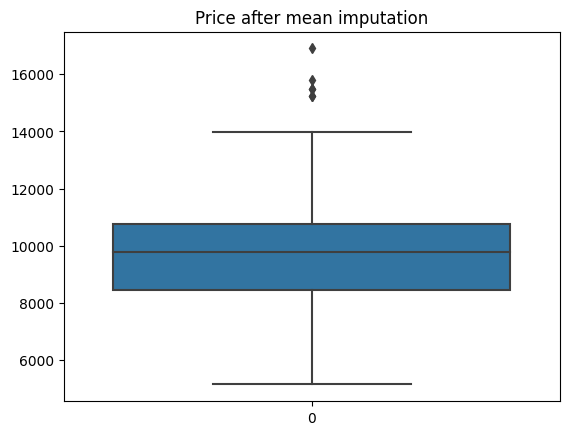

In [52]:
df2=raw_data.copy()
for i in raw_data['Price']:
    q1 = np.quantile(df2.Price,0.25)
    q3 = np.quantile(df2.Price,0.75)
    med = np.median(df2.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Price'] = df2['Price'].replace(i, np.mean(df2['Price']))
sns.boxplot(df2['Price'])
plt.title('Price after mean imputation')
plt.show()

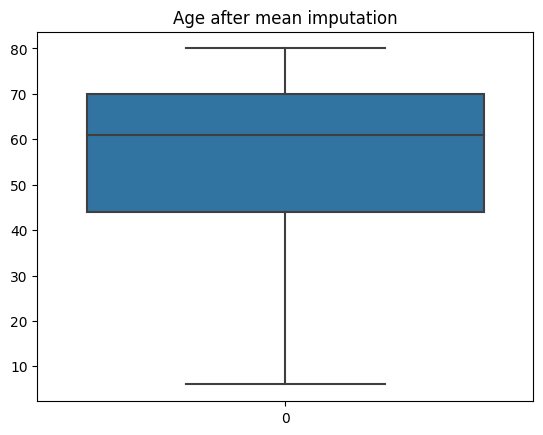

In [53]:
for i in raw_data['Age_08_04']:
    q1 = np.quantile(df2.Age_08_04,0.25)
    q3 = np.quantile(df2.Age_08_04,0.75)
    med = np.median(df2.Age_08_04)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Age_08_04'] = df2['Age_08_04'].replace(i, np.mean(df2['Age_08_04']))
sns.boxplot(df2['Age_08_04'])
plt.title('Age after mean imputation')
plt.show()

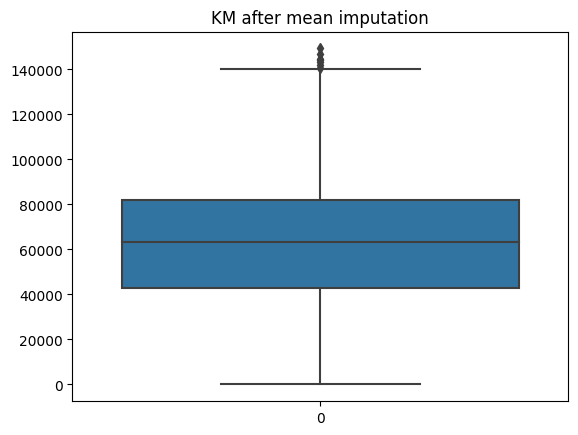

In [54]:
for i in raw_data['KM']:
    q1 = np.quantile(df2.KM,0.25)
    q3 = np.quantile(df2.KM,0.75)
    med = np.median(df2.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['KM'] = df2['KM'].replace(i, np.mean(df2['KM']))
sns.boxplot(df2['KM'])
plt.title('KM after mean imputation')
plt.show()

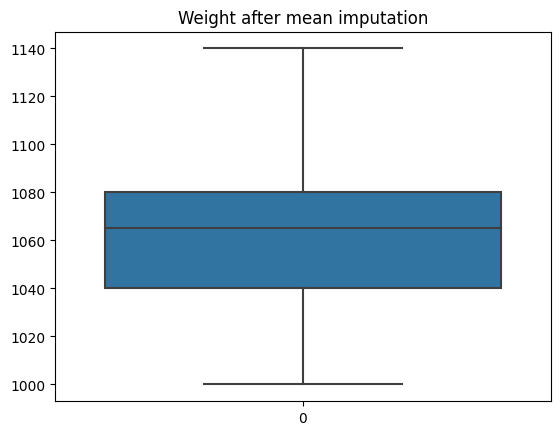

In [55]:
for i in raw_data['Weight']:
    q1 = np.quantile(df2.Weight,0.25)
    q3 = np.quantile(df2.Weight,0.75)
    med = np.median(df2.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Weight'] = df2['Weight'].replace(i, np.mean(df2['Weight']))
sns.boxplot(df2['Weight'])
plt.title('Weight after mean imputation')
plt.show()

**Let's test our data in model and find the R-squared with mean imputation data model**

In [57]:
after_mean_imputation_model = smf.ols("Price~Age_08_04+KM+Weight", data = df2).fit()
# Finding rsquared values
after_mean_imputation_model.rsquared , after_mean_imputation_model.rsquared_adj

(0.3879621958171299, 0.3866790976951533)

**Observation: As you can see even after imputation the model is not performing well it getting worse
Now we have to try something else to get out model better than the raw data**

The best thing we can do is now to remove the outlier and see the results

In [58]:
df3=raw_data.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

Text(0.5, 1.0, 'Price after removing outliers')

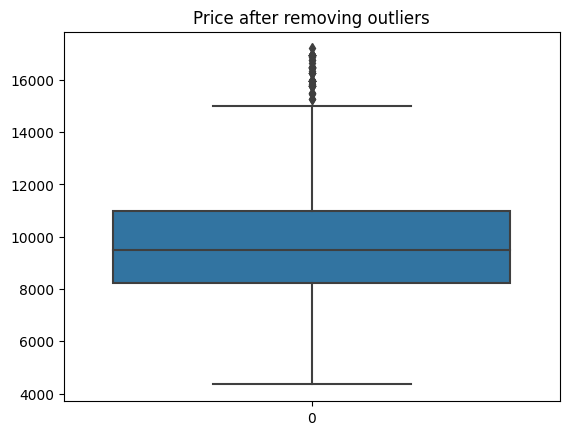

In [59]:
drop_outliers(df3, 'Price')
sns.boxplot(df3.Price)
plt.title('Price after removing outliers')

Text(0.5, 1.0, 'Age after removing outliers')

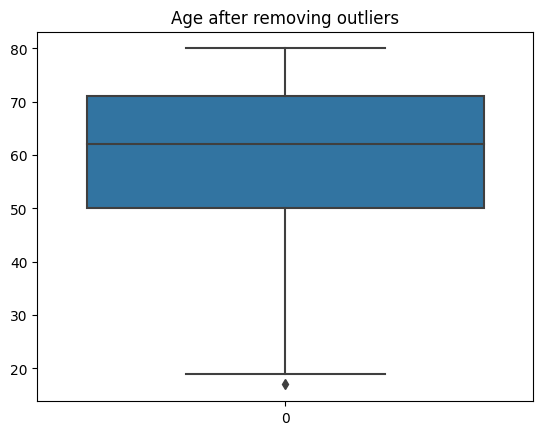

In [60]:
drop_outliers(df3, 'Age_08_04')
sns.boxplot(df3.Age_08_04)
plt.title('Age after removing outliers')

Text(0.5, 1.0, 'KM after removing outliers')

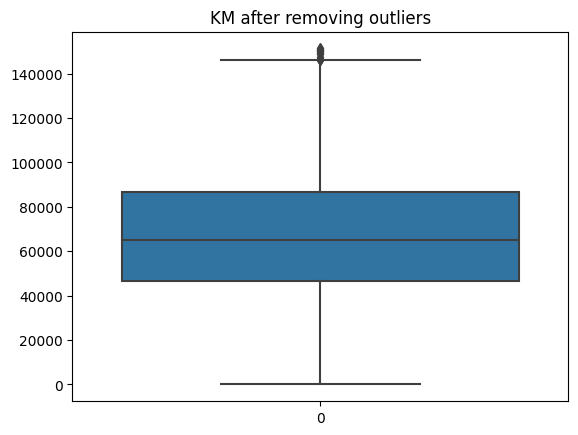

In [61]:
drop_outliers(df3, 'KM')
sns.boxplot(df3.KM)
plt.title('KM after removing outliers')

In [63]:
drop_outliers(df3, 'Weight')
sns.boxplot(df3.Weight)
plt.title('Weight after removing outliers')

KeyError: ignored

Let's test our data in model and compare the R-squared with without imputation data model


In [65]:
removed_outlier_model = smf.ols("Price~Age_08_04+KM+Weight", data = df3).fit()
# Finding rsquared values
removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj

(0.7776886294411589, 0.7771455234870249)

In [66]:
np.sqrt(removed_outlier_model.mse_resid)

1060.0301342603996

Let's try log transformation and visualize the result first


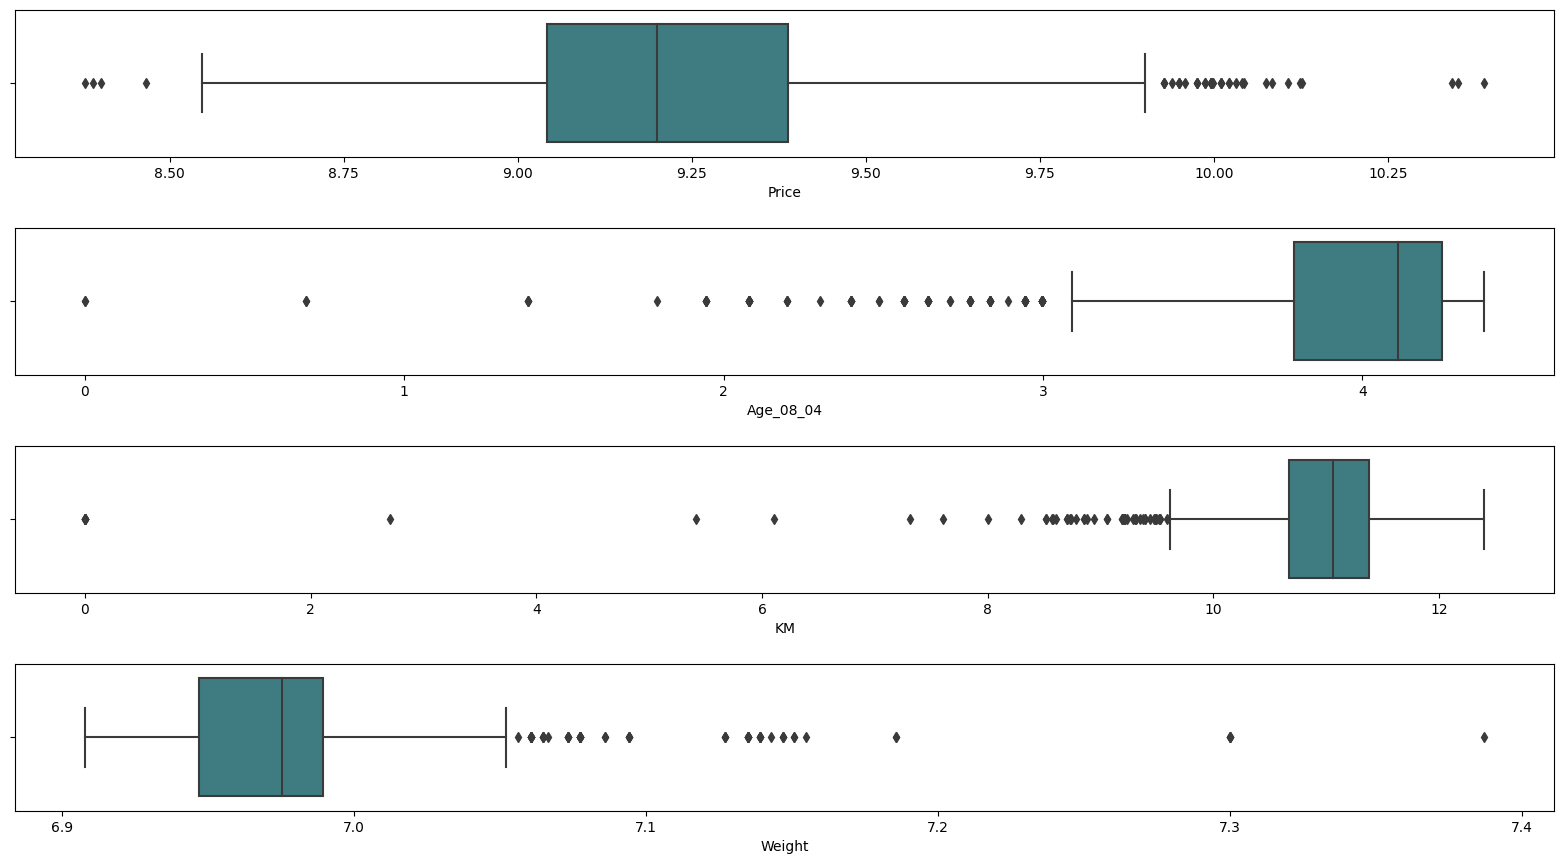

In [68]:
df=raw_data.copy()
df[continuous_feature]=np.log(df[continuous_feature])

fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age_08_04',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [69]:
log_transfomed = raw_data.copy()
log_transfomed[continuous_feature]=np.log(log_transfomed[continuous_feature])
log_transformed_model = smf.ols("Price~Age_08_04+KM+Weight", data = log_transfomed).fit()
# Finding rsquared values
log_transformed_model.rsquared , log_transformed_model.rsquared_adj

(0.7069873404282618, 0.70637305812308)

In [70]:
#declare features vector and target
x = raw_data.drop('Price', axis=1)
y = raw_data['Price']

In [71]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [72]:
# Import the module for the split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=365)

In [74]:
# Create a linear regression object
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [75]:
#making prediction
y_pred = reg.predict(x_train)

Text(0.5, 1.0, 'Residuals PDF')

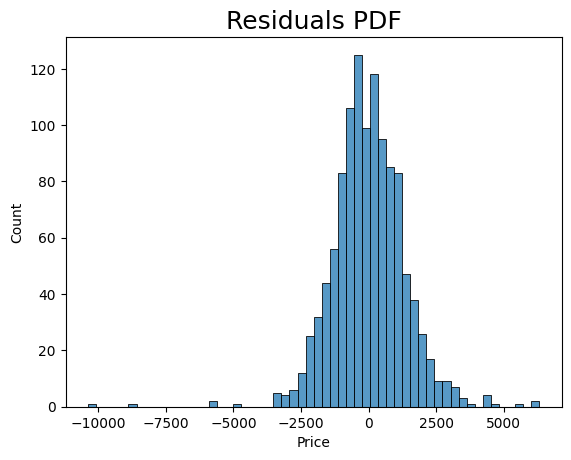

In [76]:
#plot residual
sns.histplot(y_train - y_pred)
plt.title("Residuals PDF", size=18)

In [77]:
print("R-squared:", reg.score(x_train, y_train).round(3))

R-squared: 0.86


In [78]:
print("Coefficient:", reg.coef_.round(3))

Coefficient: [-2216.368  -798.557   421.311   -40.922   -61.1      98.558    42.433
  1012.136]


In [79]:
print("Intercept:", reg.intercept_.round(3))

Intercept: 10751.23


In [80]:
#show features with their weights
reg_summary = pd.DataFrame(x.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Age_08_04,-2216.367615
1,KM,-798.557364
2,HP,421.310820
3,cc,-40.921919
4,Doors,-61.099686
5,Gears,98.558310
6,Quarterly_Tax,42.432578
7,Weight,1012.136363


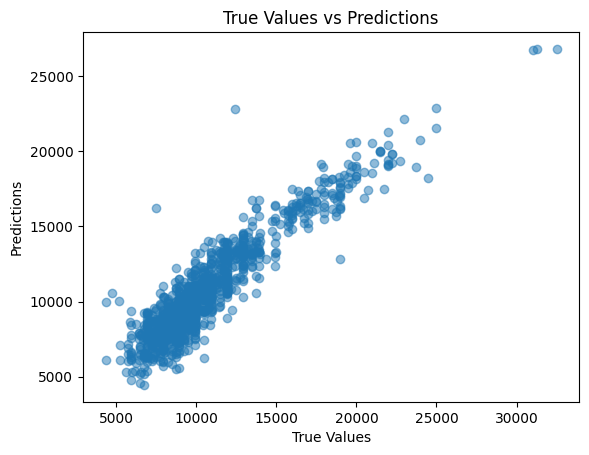

In [81]:
#plot true values vs predictions
plt.scatter(y_train, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

In [82]:
#summary
pf_df = pd.DataFrame()
pf_df['Price'] = y_train
pf_df['Prediction'] = y_pred.round(2)
pf_df['Residual'] = (y_train - y_pred).round(2)
pf_df['Difference%'] = (np.absolute((y_train - y_pred) / y_train * 100)).round(2)
pf_df

,Price,Prediction,Residual,Difference%
376,13500,13124.16,375.84,2.78
970,10495,8538.41,1956.59,18.64
43,16950,16573.95,376.05,2.22
232,12900,12439.60,460.40,3.57
947,7750,8161.99,-411.99,5.32
...,...,...,...,...
261,13500,12305.19,1194.81,8.85
428,12950,11367.49,1582.51,12.22
859,9750,8606.98,1143.02,11.72
801,9250,9527.37,-277.37,3.00


In [83]:
pf_df.describe()

,Price,Prediction,Residual,Difference%
count,1148.000000,1148.000000,1148.000000,1148.000000
mean,10702.003484,10702.003519,-0.000035,9.987352
std,3610.142890,3347.284909,1352.336757,10.242485
min,4350.000000,4448.860000,-10368.930000,0.020000
25%,8450.000000,8289.560000,-771.317500,3.762500
50%,9900.000000,9948.880000,-39.815000,7.780000
75%,11935.000000,12370.385000,787.527500,13.207500
max,32500.000000,26815.450000,6302.730000,129.090000


In [84]:
#make prediciton
y_test_pred = reg.predict(x_test)

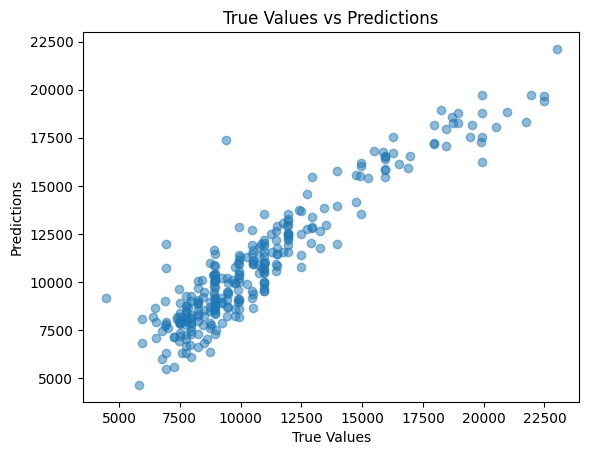

In [85]:
#plot true values vs predictions
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

In [86]:
#summary
pf_df2 = pd.DataFrame()
pf_df2['Price'] = y_test
pf_df2['Prediction'] = y_test_pred
pf_df2['Residual'] = (y_test - y_test_pred).round(2)
pf_df2['Difference%'] = (np.absolute((y_test - y_test_pred) / y_test * 100)).round(2)
pf_df2

,Price,Prediction,Residual,Difference%
514,10750,11337.186830,-587.19,5.46
1127,7500,7369.045686,130.95,1.75
418,8950,8838.467124,111.53,1.25
153,21750,18342.371178,3407.63,15.67
1212,6750,7461.181940,-711.18,10.54
...,...,...,...,...
696,9250,8970.775297,279.22,3.02
259,11950,11907.376466,42.62,0.36
419,10500,11052.260160,-552.26,5.26
921,9950,9998.374387,-48.37,0.49


In [87]:
pf_df2.describe()

,Price,Prediction,Residual,Difference%
count,287.000000,287.000000,287.000000,287.000000
mean,10796.564460,10948.138455,-151.574216,9.754146
std,3608.391802,3372.388480,1295.633292,11.040717
min,4450.000000,4649.917648,-8016.140000,0.020000
25%,8250.000000,8510.770735,-906.275000,3.395000
50%,9900.000000,10098.030391,-170.300000,8.230000
75%,11950.000000,12514.562256,586.605000,12.540000
max,23000.000000,22119.441106,3715.000000,105.690000
